In [ ]:
!pip install js

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 4.5 MB/s eta 0:00:00
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2883 sha256=e214e402db1502fd1d8b49cae5c6704da2f8f1e4bae7e65d93c75b6c6894bdb2
  Stored in directory: /root/.cache/pip/wheels/77/dc/68/d580eaea0ef6137289a09dabe661f5df14951f5c29c08d443d
Successfully built js


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [ ]:
URL

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [ ]:
boston_df=pd.read_csv(URL)

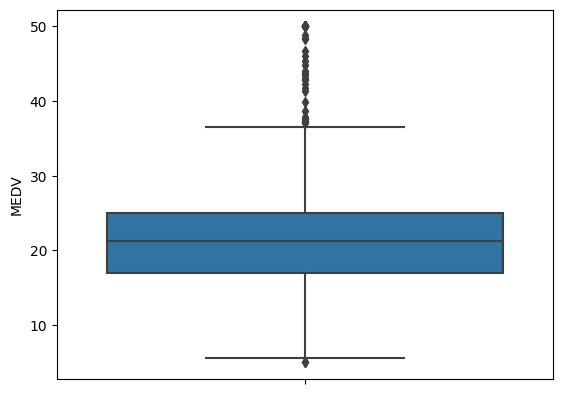

In [ ]:
ax=sns.boxplot(y="MEDV", data=boston_df)
plt.show()

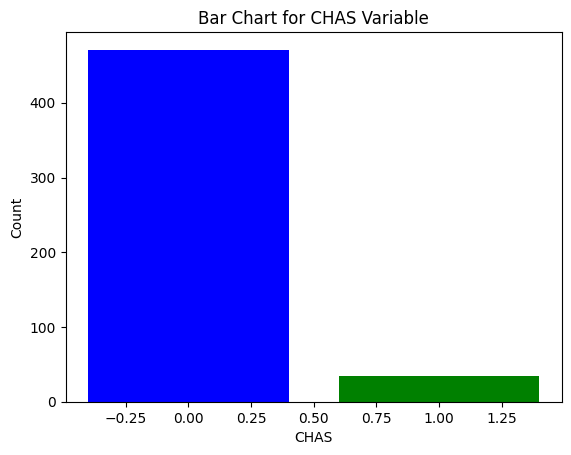

In [ ]:
plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['blue','green'])
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.title('Bar Chart for CHAS Variable')
plt.show()

In [ ]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 Years and Younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 Years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 Years and Older'

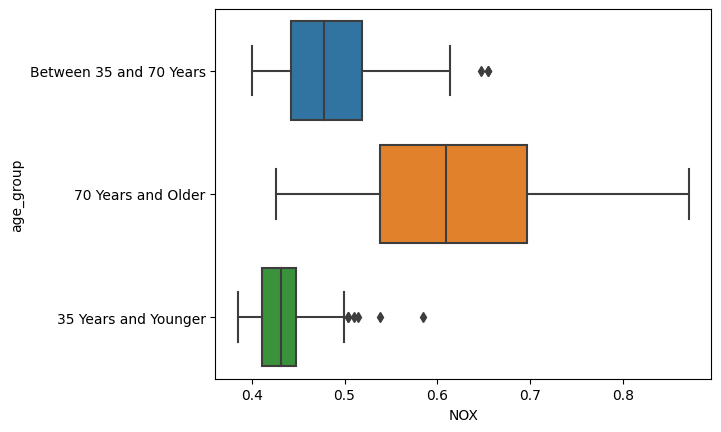

In [ ]:
ax=sns.boxplot(x='NOX', y='age_group', data=boston_df)
plt.show()

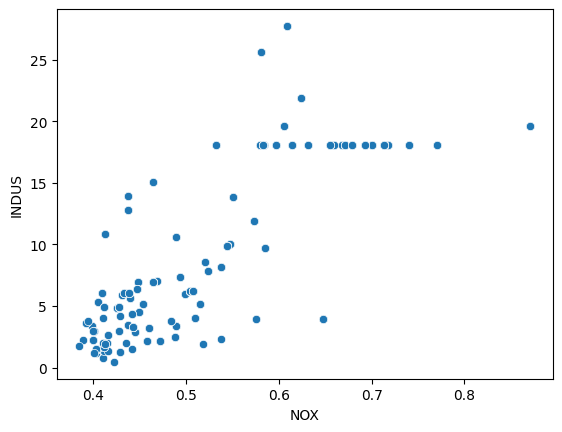

In [ ]:
ax=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

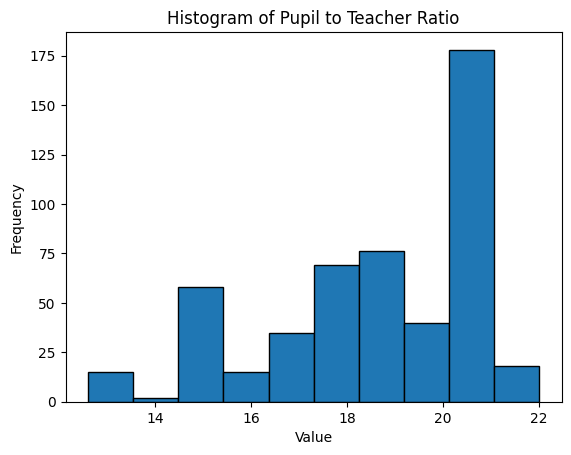

In [ ]:
# Plotting the histogram
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil to Teacher Ratio')

# Display the histogram
plt.show()

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?**

*   H0: No Significant Difference in Median Value of Houses Bounded By The Charles River
*   H1: There is a Significant Difference in Median Value of Houses Bounded By The Charles River

In [ ]:
# Perform the t-test
stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** *Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a Significant Difference in Median Value of Houses Bounded By The Charles River*

**Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940? (ANOVA)**
*   H0: The three population means are equal
*   H1: At least one of the means differ


In [ ]:
threefive_lower = boston_df[boston_df['age_group'] == '35 Years and Younger']['MEDV']
threefive_seventy = boston_df[boston_df['age_group'] == 'Between 35 and 70 Years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 Years and Older']['MEDV']

In [ ]:
f_statistic, p_value = stats.f_oneway(threefive_lower, threefive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: *Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.*

**Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)** 

*   H0: Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   H1: Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [ ]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion**: *Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations is correlated with proportion of non-retail business acres per town.*

**What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression Analysis)**

*   H0: Additional Weighted Distance to the five Boston employment centres has no impact on the median value of owner-occupied homes
*   H1: Additional Weighted Distance to the five Boston employment centres has an impact on the median value of owner-occupied homes

In [ ]:
X = boston_df['MEDV']
y = boston_df['DIS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        13:26:55   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: *p < 0.05 there is an impact on Additional Weighted Distance to the five Boston employment centres on the median value of owner-occupied homes*

*Median value of owner-occupied houses has an impact with .0572 marks*